## Importing Packages

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt

# Loading Digits Dataset

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

print("Image data shape: ", digits.data.shape)
print("Lable data shape: ", digits.target.shape)

Image data shape:  (1797, 64)
Lable data shape:  (1797,)


# Train & Testing

In [57]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(digits.data), digits.target, test_size = 0.2, random_state = 44)

results = []

grid_params = {
    'n_neighbors': np.arange(3, 12, 2),
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan'],
}
for i in range(2, 10):
    skf = StratifiedKFold(n_splits=i, random_state=0, shuffle=True)
    gsearch = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=skf, return_train_score=True, n_jobs=-1)
    gs_results = gsearch.fit(trainData, trainLabels)
    results.append({iscore: gs_results})
    print("Cross Validation on #{} Folds is Done!\n===========================================" .format(i))

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Cross Validation on #2 Folds is Done!
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Cross Validation on #3 Folds is Done!
Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Cross Validation on #4 Folds is Done!
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Cross Validation on #5 Folds is Done!
Fitting 6 folds for each of 20 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   22.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Cross Validation on #6 Folds is Done!
Fitting 7 folds for each of 20 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   26.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Cross Validation on #7 Folds is Done!
Fitting 8 folds for each of 20 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   31.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Cross Validation on #8 Folds is Done!
Fitting 9 folds for each of 20 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.8s


Cross Validation on #9 Folds is Done!


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   38.2s finished


The best parameters fits this model: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
The best score of this model on unseen data = 99.444


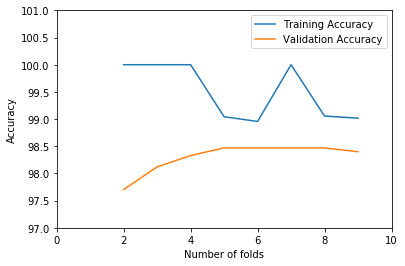

In [123]:
train_acc = []
valid_acc = []

for i, res in zip(range(2, 10), results):
    train_acc.append(res[i].cv_results_['mean_train_score'][res[i].best_index_])
    valid_acc.append(res[i].cv_results_['mean_test_score'][res[i].best_index_])

plt.plot(range(2, 10), np.array(train_acc) * 100, label = 'Training Accuracy')
plt.plot(range(2, 10), np.array(valid_acc) * 100, label = 'Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of folds')
plt.axis([0, 10, 97, 101])
plt.legend()

print("The best parameters fits this model:", gsearch.best_params_)
print("The best score of this model on unseen data = %.3f" % (gsearch.score(testData, testLabels) * 100))